# Exercise 06
**Integrante 1:** Ángela Patricia Ordoñez Castro...................................................**Código:** 201628709     
**Integrante 2:** Juan Sebastián Garcés Carranza.................................................**Código:** 201628949 


# TensorFlow and Keras


In [3]:
import numpy as np
import pylab as pl
from sklearn.datasets.samples_generator import make_moons

%matplotlib inline

# Functions for plotting 2D data and decision regions

def plot_data(X, y):
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")

def plot_decision_region(X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 30)
    y_vals = np.linspace(min_y, max_y, 30)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])
    pl.contourf(XX, YY, ZZ, 30, cmap = pl.cm.coolwarm, vmin= 0, vmax=1)
    pl.colorbar()
    pl.xlabel("x")
    pl.ylabel("y")

### 1. Multilayer neural network in TensorFlow

You need to create a neural network model in TF that is able to discriminate the two classes in the following dataset:

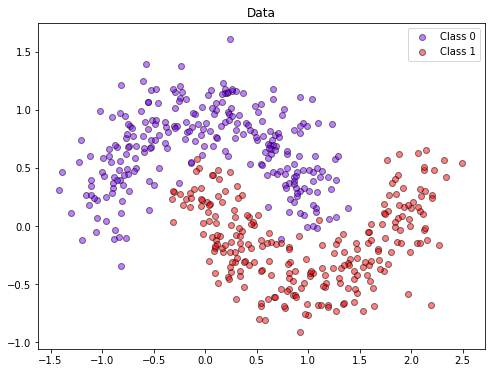

In [4]:
X, Y = make_moons(n_samples=1000, noise= 0.2, random_state=3)
x_train = X[:500]
x_test  = X[500:]
y_train = Y[:500]
y_test  = Y[500:]

pl.figure(figsize=(8, 6))
plot_data(x_train, y_train)

For this you will need to create a neural network with one hidden layer. You cannot use prebuilt models 
such as those in `tf.estimator`. **Hint**: extend the logistic regression example from the TensorFlow handout. 

Your answer must contain the following:
* A visualization of the CG of the model.
* A visualization of the decision region along with the test data.
* A snapshot from TensorBoard that shows the evolution of the training and test loss.

## Solución:

In [5]:
import tensorflow as tf
from IPython.display import clear_output, Image, display, HTML
import numpy as np
import pylab as pl
from sklearn.datasets.samples_generator import make_blobs

%matplotlib inline


# Helper functions to inline visualization of computing graphs
# Extracted from: 
# https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/tutorials/deepdream/deepdream.ipynb
def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

# Functions for plotting 2D data and decision regions

def plot_data(X, y):
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")

def plot_decision_region(X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 30)
    y_vals = np.linspace(min_y, max_y, 30)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])
    pl.contourf(XX, YY, ZZ, 30, cmap = pl.cm.coolwarm, vmin= -1, vmax=2)
    pl.colorbar()
    pl.xlabel("x")
    pl.ylabel("y")

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Construimos grafo del modelo:

In [6]:
def variable_summaries(var):
    with tf.name_scope('summaries'):
        mean = tf.reduce_mean(var)
        tf.summary.scalar('mean', mean)
        with tf.name_scope('stddev'):
            stddev = tf.sqrt(tf.reduce_mean(tf.square(var - mean)))
        tf.summary.scalar('stddev', stddev)
        tf.summary.scalar('max', tf.reduce_max(var))
        tf.summary.scalar('min', tf.reduce_min(var))
        tf.summary.histogram('histogram', var)

In [7]:
numN = 10
graph = tf.Graph()
with graph.as_default():
    
    x = tf.placeholder(tf.float32,shape=[None,2]) 
    y_true = tf.placeholder(tf.float32,shape=None) 
    
    # Agregamos una capa intermedia de neuronas:
    with tf.name_scope('hidden_layer') as scope: 
        w_1 = tf.Variable(tf.random_normal([numN,2]),dtype=tf.float32,name='weights_1')
        b1 = tf.Variable(tf.random_normal([numN,1]),dtype=tf.float32,name='bias1') 
        variable_summaries(w_1)
        variable_summaries(b1)
        
        #h = tf.matmul(w_1,tf.transpose(x)) + b1
        h = tf.sigmoid(tf.matmul(w_1,tf.transpose(x)) + b1, name='sigmoid') #brosfcasting
        variable_summaries(h)

    # Modelo de Inferencia:
    with tf.name_scope('inference') as scope:
        w_2 = tf.Variable(tf.random_normal([1,numN]),dtype=tf.float32,name='weights')
        b = tf.Variable(0,dtype=tf.float32,name='bias') 
        y_pred = tf.sigmoid(tf.matmul(w_2,h) + b )
        variable_summaries(w_2)
        variable_summaries(b)
        
    # Modelo de perdida:
    with tf.name_scope('loss') as scope:
        loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true,logits=y_pred)
        loss = tf.reduce_mean(loss) 
        variable_summaries(loss)
        
    # Entrenamiento del modelo:
    with tf.name_scope('train') as scope:
        learning_rate = 1.0
        optimizer = tf.train.GradientDescentOptimizer(learning_rate) 
        train = optimizer.minimize(loss)
    
    merged = tf.summary.merge_all()
    init = tf.global_variables_initializer()

    #Visualización CG del modelo:
    %matplotlib inline
show_graph(graph.as_graph_def())

### Visualizamos la región de decisión:

0 0.703339 0.69110304
20 0.66814333 0.6605492
40 0.6465867 0.63781285
60 0.6289403 0.6197206
80 0.6158428 0.60675097
100 0.60618395 0.5974172
120 0.5989495 0.5905537
140 0.59341866 0.58538353
160 0.58910376 0.58139837
180 0.5856752 0.5782619
200 0.58290637 0.5757472
220 0.58063805 0.57369703
240 0.5787555 0.57200074
260 0.5771754 0.57057863
280 0.57583463 0.56937206
300 0.5746865 0.5683374
320 0.5736946 0.567442
340 0.5728308 0.5666602
360 0.57207316 0.5659725
380 0.57140386 0.5653634


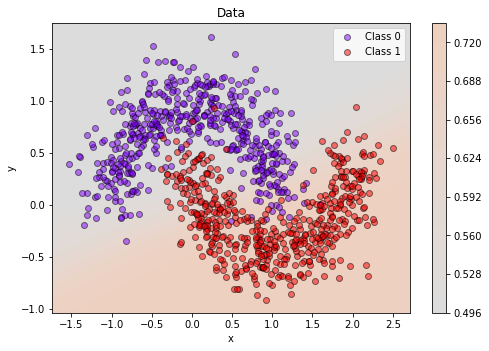

In [8]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

num_epochs = 1000
losses = []

LOG_DIR = 'logs'
train_writer = tf.summary.FileWriter(LOG_DIR + '/train',
                                 graph=graph)
test_writer = tf.summary.FileWriter(LOG_DIR + '/test')

num_epochs = 400

with graph.as_default():
    with tf.Session() as sess:
        
        sess.run(init)      
        for step in range(num_epochs):
            summary, train_loss, _ = sess.run([merged, loss, train] ,{x: x_train, y_true: y_train})
            train_writer.add_summary(summary, step)
            summary, val_loss = sess.run([merged, loss] ,{x: x_test, y_true: y_test})
            test_writer.add_summary(summary, step)
            if step % 20 == 0:
                print(step, train_loss, val_loss)
                
        wval = sess.run(w_1)
        result = sess.run(y_pred, {x:np.array([[1,2]])}) 
        def pred_fun(x1, x2):
            xval = np.array([[x1, x2]])
            return sigmoid(sess.run(y_pred,{x: xval}))
        
        pl.figure(figsize = (8,16/3))    
        plot_decision_region(X, pred_fun)
        plot_data(X, Y)

### Visualzamos la función de entrenamiento y la función de perdida con tensorboard:

Para activar TensorBoard: Desde la consola se ejecuta el siguiente comando:

`tensorboard --logdir=**Path**\logs`

Donde el "Path" hace referencia a la dirección de la carpeta donde esta alojado este notebook.

Después de ejecutar el código anterior, se pueden ver los resultados en: http://desktop-p10c8sg:6006 o en la dirección que arroje la consola.

### 2. Improving the Keras text classifier

Your goal is to improve the performance of the text classifier in the Keras handout. This is are the things that you need to try:

* Different activation functions for the hidden layer (https://keras.io/activations/)
* Different optimizers (https://keras.io/optimizers/)
* Add dropout between the hidden layer and the output layer (https://keras.io/layers/core/#dropout)
* Different initializers for the dense layers (https://keras.io/initializers/)

Try different combinations and report your findings at the end. Which configuration got the best accuracy in test?


## Solución:

Definimos las bases de entrenamiento y de prueba:

In [9]:
import numpy as np
import pylab as pl
import keras

from keras.datasets import reuters
from keras.layers import Dropout
from keras.preprocessing.text import Tokenizer

max_words = 1000

print('Loading data...')
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words,
                                                         test_split=0.2)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

num_classes = np.max(y_train) + 1
print(num_classes, 'classes')



Using TensorFlow backend.


Loading data...
8982 train sequences
2246 test sequences
46 classes


In [10]:
tokenizer = Tokenizer(num_words=max_words)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (8982, 1000)
x_test shape: (2246, 1000)


In [11]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

y_train shape: (8982, 46)
y_test shape: (2246, 46)


## Usando diferentes funciones de activación:

In [12]:
#Librerias a utilizar:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.datasets import reuters
from keras.layers import Dropout 
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam, TFOptimizer
from livelossplot import PlotLossesKeras
%matplotlib inline

***Modelo 1: Función de activación sigmoid***

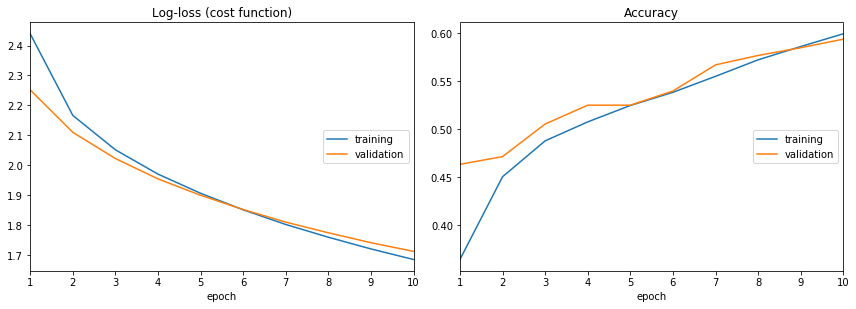

2246/2246 [==============================] - 0s 62us/step
Test score: 1.7121588453477976
Modelo 1: 0.593499554790563


In [13]:
#Definimos el modelo:

model1 = Sequential()
model1.add(Dense(256, input_shape=(max_words,)))
model1.add(Activation('sigmoid'))
model1.add(Dense(num_classes))
model1.add(Activation('softmax'))

#Compilamos el modelo:

model1.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(),
              metrics = ['accuracy'])

#Calculamos medida de desempeño:

model1.fit(x_train, y_train, validation_data=[x_test, y_test], 
          batch_size=32, epochs=10, verbose=1,
          callbacks=[PlotLossesKeras()])

score1 = model1.evaluate(x_test, y_test)
print('Test score:', score1[0])
print('Modelo 1:', score1[1])

***Modelo 2: Función de activación relu***

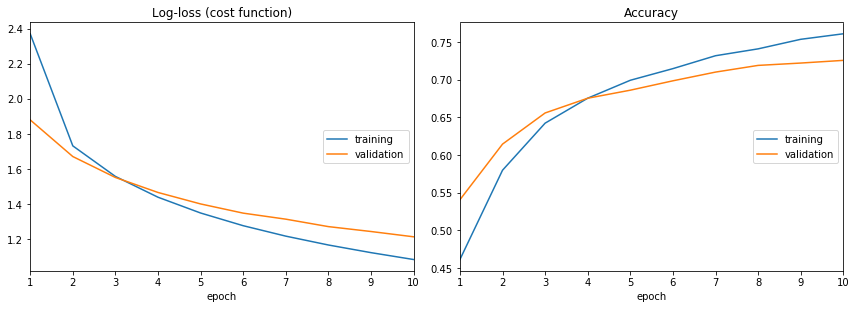

2246/2246 [==============================] - 0s 57us/step
Test score: 1.21338355615536
Modelo 2: 0.7257346393853983


In [14]:
#Definimos el modelo:

model2 = Sequential()
model2.add(Dense(256, input_shape=(max_words,)))
model2.add(Activation('relu'))
model2.add(Dense(num_classes))
model2.add(Activation('softmax'))

#Compilamos el modelo:

model2.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(),
              metrics = ['accuracy'])

#Calculamos medida de desmpeño:


model2.fit(x_train, y_train, validation_data=[x_test, y_test], 
          batch_size=32, epochs=10, verbose=1,
          callbacks=[PlotLossesKeras()])

score2 = model2.evaluate(x_test, y_test)
print('Test score:', score2[0])
print('Modelo 2:', score2[1])


***Modelo 3: Función de activación selu***

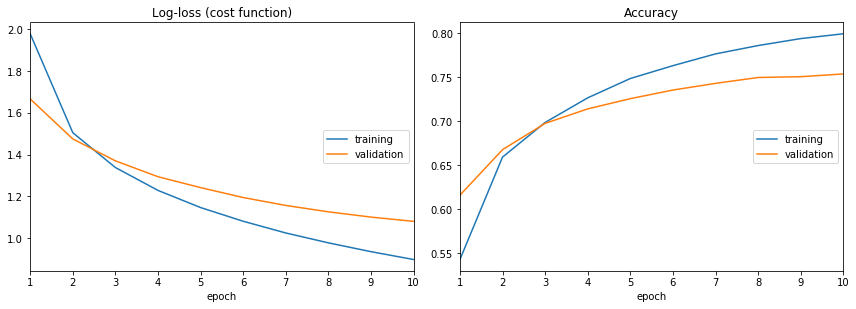

2246/2246 [==============================] - 0s 61us/step
Test score: 1.081010010236093
Modelo 3: 0.753339269839539


In [15]:
#Modelo:

model3 = Sequential()
model3.add(Dense(256, input_shape=(max_words,)))
model3.add(Activation('selu'))
model3.add(Dense(num_classes))
model3.add(Activation('softmax'))


#Compilación

model3.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(),
              metrics = ['accuracy'])
#Medida de desempeño:

model3.fit(x_train, y_train, validation_data=[x_test, y_test], 
          batch_size=32, epochs=10, verbose=1,
        callbacks=[PlotLossesKeras()])

score3 = model3.evaluate(x_test, y_test)
print('Test score:', score3[0])
print('Modelo 3:', score3[1])

***Modelo 4: Función de activación elu***

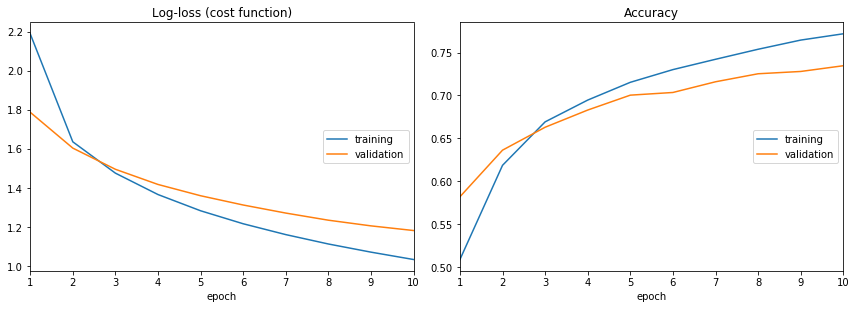

2246/2246 [==============================] - 0s 63us/step
Test score: 1.1816630199989462
Modelo 4: 0.734639358886734


In [16]:
#Modelo:
model4 = Sequential()
model4.add(Dense(256, input_shape=(max_words,)))
model4.add(Activation('elu'))
model4.add(Dense(num_classes))
model4.add(Activation('softmax'))


#Compilación

model4.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(),
              metrics = ['accuracy'])

#Medida de desempeño:

model4.fit(x_train, y_train, validation_data=[x_test, y_test], 
          batch_size=32, epochs=10, verbose=1,
        callbacks=[PlotLossesKeras()])

score4 = model4.evaluate(x_test, y_test)
print('Test score:', score4[0])
print('Modelo 4:', score4[1])

***Modelo 5: Función de activación tanh***

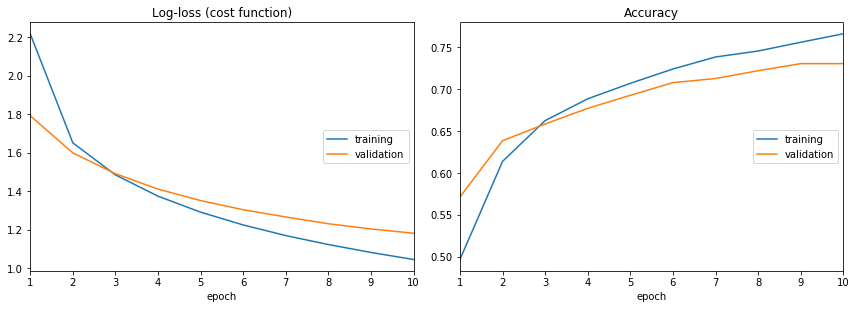

2246/2246 [==============================] - 0s 67us/step
Test score: 1.181923916375966
Modelo 5: 0.730632235111133


In [17]:
#Definimos modelo:

model5 = Sequential()
model5.add(Dense(256, input_shape=(max_words,)))
model5.add(Activation('tanh'))
model5.add(Dense(num_classes))
model5.add(Activation('softmax'))

#Compilamos modelo:

model5.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(),
              metrics = ['accuracy'])

#Calculamos medida de desempeño:

model5.fit(x_train, y_train, validation_data=[x_test, y_test], 
          batch_size=32, epochs=10, verbose=1,
        callbacks=[PlotLossesKeras()])

score5 = model5.evaluate(x_test, y_test)
print('Test score:', score5[0])
print('Modelo 5:', score5[1])

***Modelo 6: Función de activación hard_sigmoid***

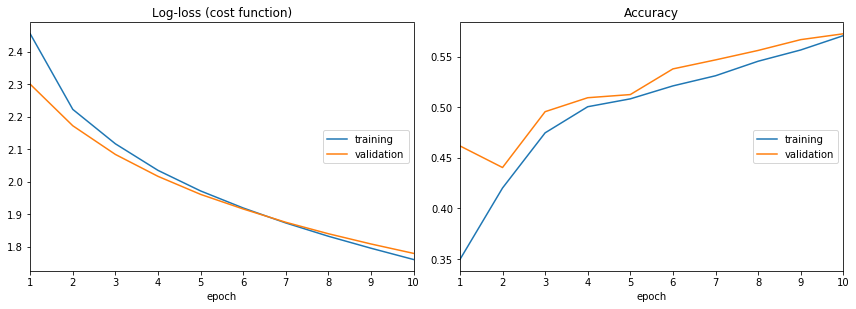

2246/2246 [==============================] - 0s 60us/step
Test score: 1.7793189330708206
Modelo 6: 0.5725734639624241


In [18]:
#Modelo:

model6 = Sequential()
model6.add(Dense(256, input_shape=(max_words,)))
model6.add(Activation('hard_sigmoid'))
model6.add(Dense(num_classes))
model6.add(Activation('softmax'))

#Compilación
model6.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(),
              metrics = ['accuracy'])

#Medida de desempeño:

model6.fit(x_train, y_train, validation_data=[x_test, y_test], 
          batch_size=32, epochs=10, verbose=1,
        callbacks=[PlotLossesKeras()])

score6 = model6.evaluate(x_test, y_test)
print('Test score:', score6[0])
print('Modelo 6:', score6[1])

***Modelo 7: Función de activación softmax***

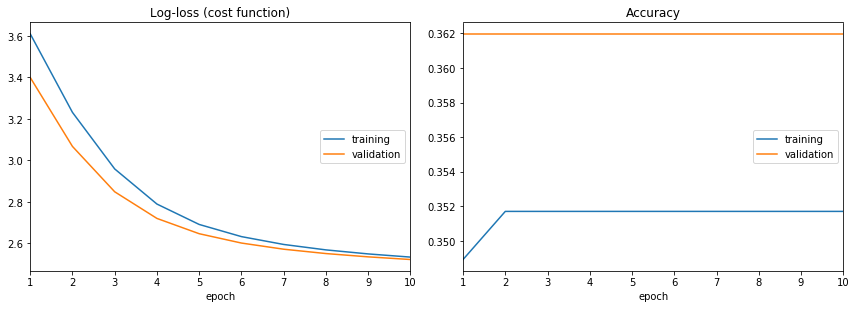

2246/2246 [==============================] - 0s 83us/step
Test score: 2.5219456332131145
Modelo 7: 0.36197684778237277


In [19]:
#Definimos modelo:

model7 = Sequential()
model7.add(Dense(256, input_shape=(max_words,)))
model7.add(Activation('softmax'))
model7.add(Dense(num_classes))
model7.add(Activation('softmax'))

#Compilamos modelo:

model7.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(),
              metrics = ['accuracy'])


#Calculamos medida de desempeño:

model7.fit(x_train, y_train, validation_data=[x_test, y_test], 
          batch_size=32, epochs=10, verbose=1,
        callbacks=[PlotLossesKeras()])

score7 = model7.evaluate(x_test, y_test)
print('Test score:', score7[0])
print('Modelo 7:', score7[1])

***Modelo 8: Función de activación softplus***

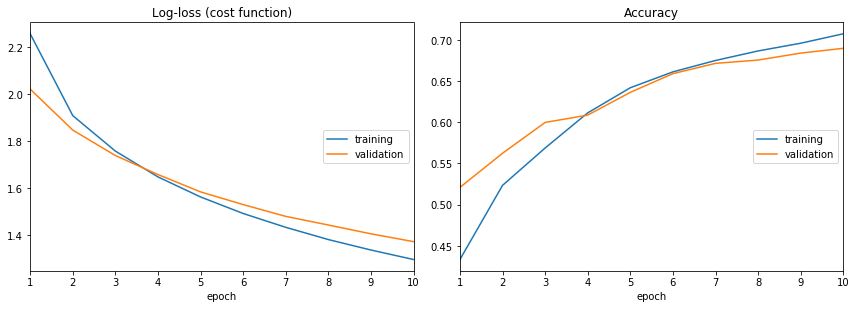

2246/2246 [==============================] - 0s 65us/step
Test score: 1.3726438752052939
Modelo 8: 0.6896705254049887


In [20]:
#Modelo:

model8 = Sequential()
model8.add(Dense(256, input_shape=(max_words,)))
model8.add(Activation('softplus'))
model8.add(Dense(num_classes))
model8.add(Activation('softmax'))

#Compilación:

model8.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(),
              metrics = ['accuracy'])
#Medida de desempeño:

model8.fit(x_train, y_train, validation_data=[x_test, y_test], 
          batch_size=32, epochs=10, verbose=1,
        callbacks=[PlotLossesKeras()])


score8 = model8.evaluate(x_test, y_test)
print('Test score:', score8[0])
print('Modelo 8:', score8[1])

***Modelo 9: Función de activación softsign***

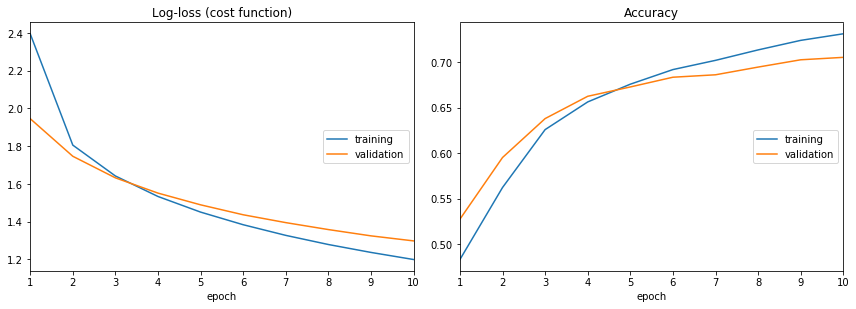

2246/2246 [==============================] - 0s 67us/step
Test score: 1.2972285787866038
Modelo 9: 0.7052537845323262


In [21]:
#Modelo:

model9 = Sequential()
model9.add(Dense(256, input_shape=(max_words,)))
model9.add(Activation('softsign'))
model9.add(Dense(num_classes))
model9.add(Activation('softmax'))

#Compilación

model9.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(),
              metrics = ['accuracy'])

#Medida de desempeño:

model9.fit(x_train, y_train, validation_data=[x_test, y_test], 
          batch_size=32, epochs=10, verbose=1,
        callbacks=[PlotLossesKeras()])

score9 = model9.evaluate(x_test, y_test)
print('Test score:', score9[0])
print('Modelo 9:', score9[1])

## Conclusión:

In [22]:
print('Modelo 1:', score1[1])
print('Modelo 2:', score2[1])
print('Modelo 3:', score3[1])
print('Modelo 4:', score4[1])
print('Modelo 5:', score5[1])
print('Modelo 6:', score6[1])
print('Modelo 7:', score7[1])
print('Modelo 8:', score8[1])
print('Modelo 9:', score9[1])


Modelo 1: 0.593499554790563
Modelo 2: 0.7257346393853983
Modelo 3: 0.753339269839539
Modelo 4: 0.734639358886734
Modelo 5: 0.730632235111133
Modelo 6: 0.5725734639624241
Modelo 7: 0.36197684778237277
Modelo 8: 0.6896705254049887
Modelo 9: 0.7052537845323262


El mejor modelo encontrado, mediante las diferentes funciones de activación, es el modelo 3, en el cuál se utilizó la función de activación "Selu".

Ahora se probaran diferentes optimizadores, para seguir mejorando nuestro modelo.

## Usando diferentes funciones de Optimización:

***Modelo 10: Función de activación selu y optimizador RMSprop ***

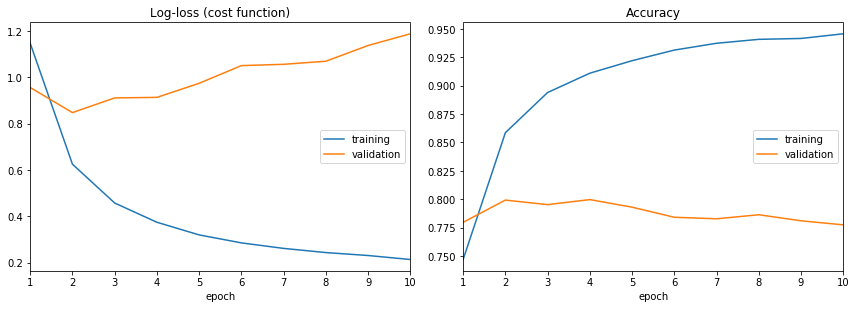

2246/2246 [==============================] - 0s 72us/step
Test score: 1.1885554474162292
Modelo 10: 0.7773820125196835


In [23]:
#Modelo:

model10 = Sequential()
model10.add(Dense(256, input_shape=(max_words,)))
model10.add(Activation('selu'))
model10.add(Dense(num_classes))
model10.add(Activation('softmax'))

#Compilación

model10.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(),
              metrics = ['accuracy'])

#Medida de desempeño:

model10.fit(x_train, y_train, validation_data=[x_test, y_test], 
          batch_size=32, epochs=10, verbose=1,
        callbacks=[PlotLossesKeras()])

score10 = model10.evaluate(x_test, y_test)
print('Test score:', score10[0])
print('Modelo 10:', score10[1])

***Modelo 11: Función de activación selu y optimizador Adagrad***

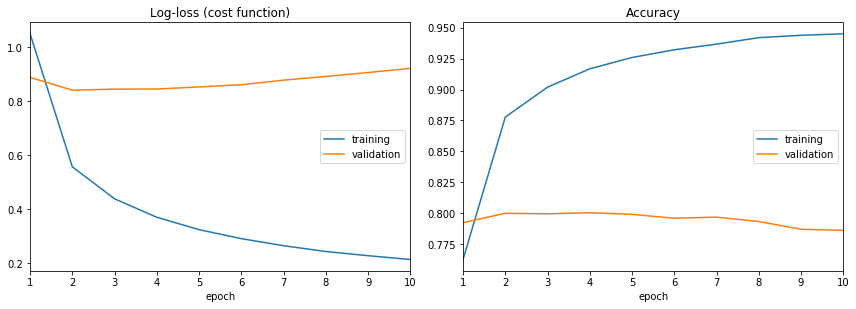

2246/2246 [==============================] - 0s 86us/step
Test score: 0.9218328805874207
Modelo 11: 0.7862867320210193


In [24]:
#Modelo:

model11 = Sequential()
model11.add(Dense(256, input_shape=(max_words,)))
model11.add(Activation('selu'))
model11.add(Dense(num_classes))
model11.add(Activation('softmax'))

#Compilación

model11.compile(loss = 'categorical_crossentropy',
              optimizer = Adagrad(),
              metrics = ['accuracy'])

#Medida de desempeño:

model11.fit(x_train, y_train, validation_data=[x_test, y_test], 
          batch_size=32, epochs=10, verbose=1,
        callbacks=[PlotLossesKeras()])

score11 = model11.evaluate(x_test, y_test)
print('Test score:', score11[0])
print('Modelo 11:', score11[1])

***Modelo 12: Función de activación selu y optimizador Adadelta***

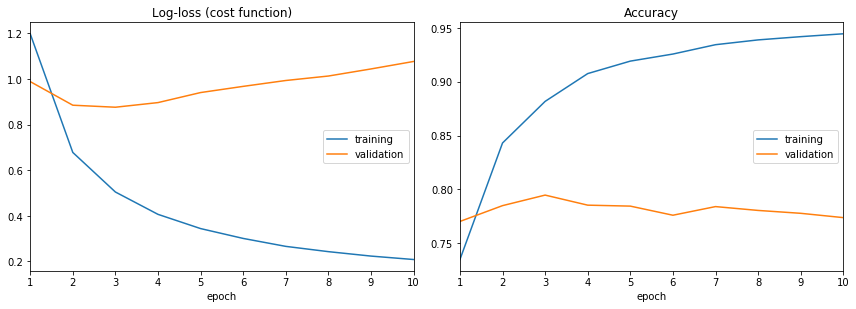

2246/2246 [==============================] - 0s 56us/step
Test score: 1.076568986513948
Modelo 12: 0.7738201247191493


In [25]:
#Modelo:

model12 = Sequential()
model12.add(Dense(256, input_shape=(max_words,)))
model12.add(Activation('selu'))
model12.add(Dense(num_classes))
model12.add(Activation('softmax'))

#Compilación

model12.compile(loss = 'categorical_crossentropy',
              optimizer = Adadelta(),
              metrics = ['accuracy'])

#Medida de desempeño:

model12.fit(x_train, y_train, validation_data=[x_test, y_test], 
          batch_size=32, epochs=10, verbose=1,
        callbacks=[PlotLossesKeras()])

score12= model12.evaluate(x_test, y_test)
print('Test score:', score12[0])
print('Modelo 12:', score12[1])

***Modelo 13: Función de activación selu y optimizador Adam***

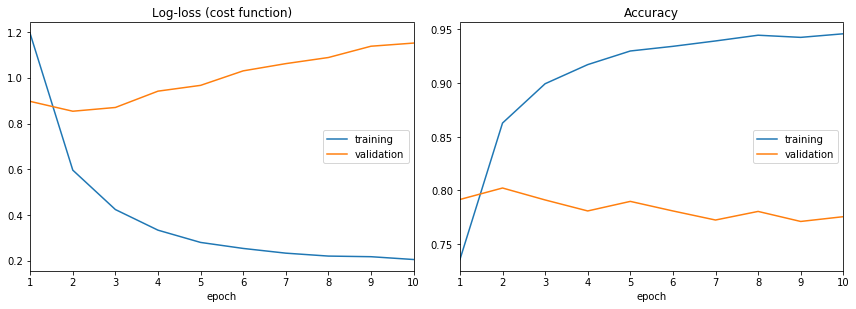

2246/2246 [==============================] - 0s 53us/step
Test score: 1.151797148338515
Modelo 13: 0.7756010686194165


In [26]:
#Modelo:

model13 = Sequential()
model13.add(Dense(256, input_shape=(max_words,)))
model13.add(Activation('selu'))
model13.add(Dense(num_classes))
model13.add(Activation('softmax'))

#Compilación

model13.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(),
              metrics = ['accuracy'])

#Medida de desempeño:

model13.fit(x_train, y_train, validation_data=[x_test, y_test], 
          batch_size=32, epochs=10, verbose=1,
        callbacks=[PlotLossesKeras()])

score13 = model13.evaluate(x_test, y_test)
print('Test score:', score13[0])
print('Modelo 13:', score13[1])

***Modelo 14: Función de activación selu y optimizador Adamax***

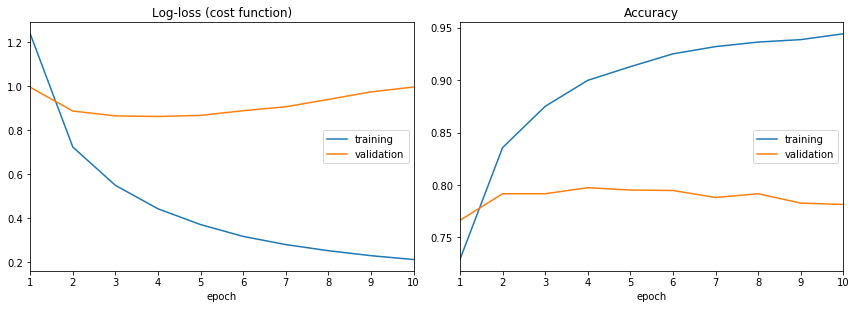

2246/2246 [==============================] - 0s 53us/step
Test score: 0.9967916393959405
Modelo 14: 0.7813891362952846


In [27]:
#Modelo:

model14 = Sequential()
model14.add(Dense(256, input_shape=(max_words,)))
model14.add(Activation('selu'))
model14.add(Dense(num_classes))
model14.add(Activation('softmax'))

#Compilación

model14.compile(loss = 'categorical_crossentropy',
              optimizer = Adamax(),
              metrics = ['accuracy'])

#Medida de desempeño:

model14.fit(x_train, y_train, validation_data=[x_test, y_test], 
          batch_size=32, epochs=10, verbose=1,
        callbacks=[PlotLossesKeras()])

score14 = model14.evaluate(x_test, y_test)
print('Test score:', score14[0])
print('Modelo 14:', score14[1])

***Modelo 15: Función de activación selu y optimizador Nadam***

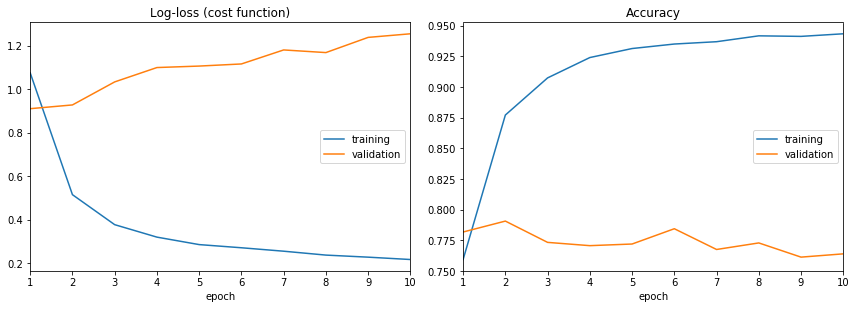

2246/2246 [==============================] - 0s 54us/step
Test score: 1.2547490501233964
Modelo 15: 0.76402493326768


In [28]:
#Modelo:

model15 = Sequential()
model15.add(Dense(256, input_shape=(max_words,)))
model15.add(Activation('selu'))
model15.add(Dense(num_classes))
model15.add(Activation('softmax'))

#Compilación

model15.compile(loss = 'categorical_crossentropy',
              optimizer = Nadam(),
              metrics = ['accuracy'])

#Medida de desempeño:

model15.fit(x_train, y_train, validation_data=[x_test, y_test], 
          batch_size=32, epochs=10, verbose=1,
        callbacks=[PlotLossesKeras()])

score15 = model15.evaluate(x_test, y_test)
print('Test score:', score15[0])
print('Modelo 15:', score15[1])

***Modelo 16: Función de activación selu y optimizador TFOptimizer***

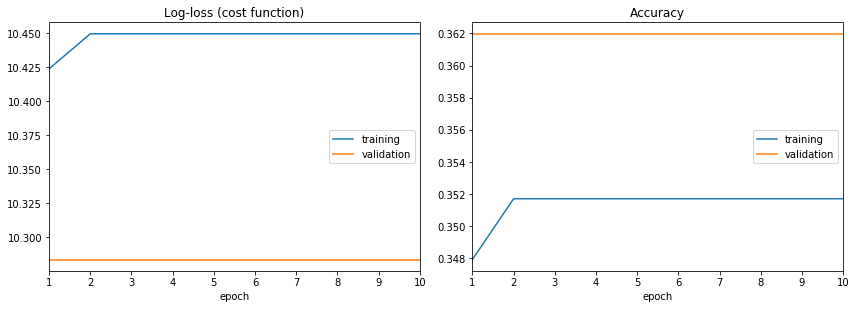

2246/2246 [==============================] - 0s 54us/step
Test score: 10.283718071340559
Modelo 16: 0.36197684778237277


In [29]:
#Modelo:

model16 = Sequential()
model16.add(Dense(256, input_shape=(max_words,)))
model16.add(Activation('selu'))
model16.add(Dense(num_classes))
model16.add(Activation('softmax'))

#Compilación

model16.compile(loss = 'categorical_crossentropy',
              optimizer = TFOptimizer(optimizer),
              metrics = ['accuracy'])

#Medida de desempeño:

model16.fit(x_train, y_train, validation_data=[x_test, y_test], 
          batch_size=32, epochs=10, verbose=1,
        callbacks=[PlotLossesKeras()])

score16 = model16.evaluate(x_test, y_test)
print('Test score:', score16[0])
print('Modelo 16:', score16[1])

## Conclusión:

In [30]:
print('Modelo 10:', score10[1])
print('Modelo 11:', score11[1])
print('Modelo 12:', score12[1])
print('Modelo 13:', score13[1])
print('Modelo 14:', score14[1])
print('Modelo 15:', score15[1])
print('Modelo 16:', score16[1])


Modelo 10: 0.7773820125196835
Modelo 11: 0.7862867320210193
Modelo 12: 0.7738201247191493
Modelo 13: 0.7756010686194165
Modelo 14: 0.7813891362952846
Modelo 15: 0.76402493326768
Modelo 16: 0.36197684778237277


El mejor modelo obtenido mediante los diferentes optimizadores es el modelo 11, en el cuál se utilizó el optimizador "Adagrad"

###  Añadir Dropout entre la capa oculta y la capa da salida:

***Modelo 17: Función de activación selu, optimizador Adagrad y Dropout 0.1***

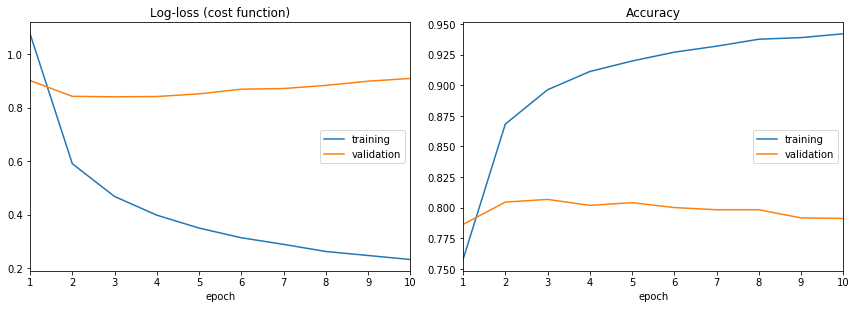

2246/2246 [==============================] - 0s 54us/step
Test score: 0.909134727445757
Modelo 17: 0.791184327746754


In [31]:
#Modelo:

model17 = Sequential()
model17.add(Dense(256, input_shape=(max_words,)))
model17.add(Dropout(0.1))
model17.add(Activation('selu'))
model17.add(Dense(num_classes))
model17.add(Activation('softmax'))

#Compilación

model17.compile(loss = 'categorical_crossentropy',
              optimizer = Adagrad(),
              metrics = ['accuracy'])

#Medida de desempeño:

model17.fit(x_train, y_train, validation_data=[x_test, y_test], 
          batch_size=32, epochs=10, verbose=1,
        callbacks=[PlotLossesKeras()])

score17 = model17.evaluate(x_test, y_test)
print('Test score:', score17[0])
print('Modelo 17:', score17[1])

***Modelo 18: Función de activación selu, optimizador Adagrad y Dropout 0.2***

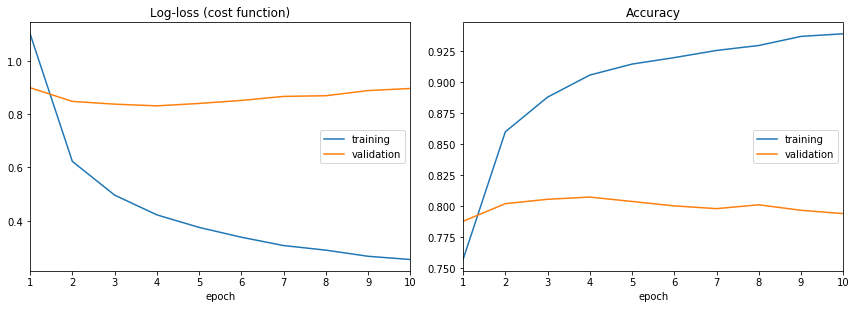

2246/2246 [==============================] - 0s 55us/step
Test score: 0.8964655637104174
Modelo 18: 0.7938557435971546


In [32]:
#Modelo:

model18 = Sequential()
model18.add(Dense(256, input_shape=(max_words,)))
model18.add(Dropout(0.2))
model18.add(Activation('selu'))
model18.add(Dense(num_classes))
model18.add(Activation('softmax'))

#Compilación

model18.compile(loss = 'categorical_crossentropy',
              optimizer = Adagrad(),
              metrics = ['accuracy'])

#Medida de desempeño:

model18.fit(x_train, y_train, validation_data=[x_test, y_test], 
          batch_size=32, epochs=10, verbose=1,
        callbacks=[PlotLossesKeras()])

score18 = model18.evaluate(x_test, y_test)
print('Test score:', score18[0])
print('Modelo 18:', score18[1])

***Modelo 19: Función de activación selu, optimizador Adagrad y Dropout 0.3***

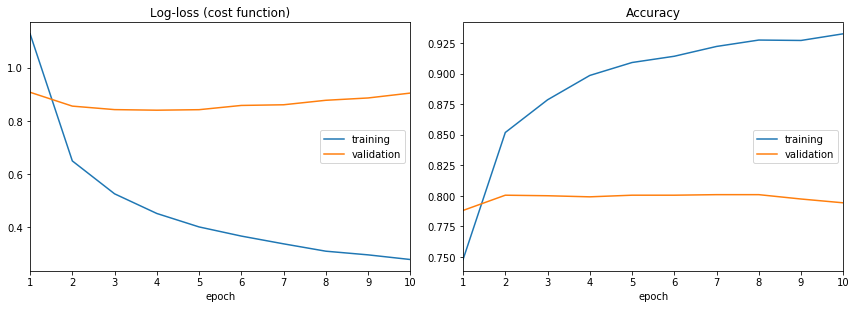

2246/2246 [==============================] - 0s 56us/step
Test score: 0.9047623723081892
Modelo 19: 0.7943009795722215


In [33]:
#Modelo:

model19 = Sequential()
model19.add(Dense(256, input_shape=(max_words,)))
model19.add(Dropout(0.3))
model19.add(Activation('selu'))
model19.add(Dense(num_classes))
model19.add(Activation('softmax'))

#Compilación

model19.compile(loss = 'categorical_crossentropy',
              optimizer = Adagrad(),
              metrics = ['accuracy'])

#Medida de desempeño:

model19.fit(x_train, y_train, validation_data=[x_test, y_test], 
          batch_size=32, epochs=10, verbose=1,
        callbacks=[PlotLossesKeras()])

score19 = model19.evaluate(x_test, y_test)
print('Test score:', score19[0])
print('Modelo 19:', score19[1])

***Modelo 20: Función de activación selu, optimizador Adagrad y Dropout 0.4***

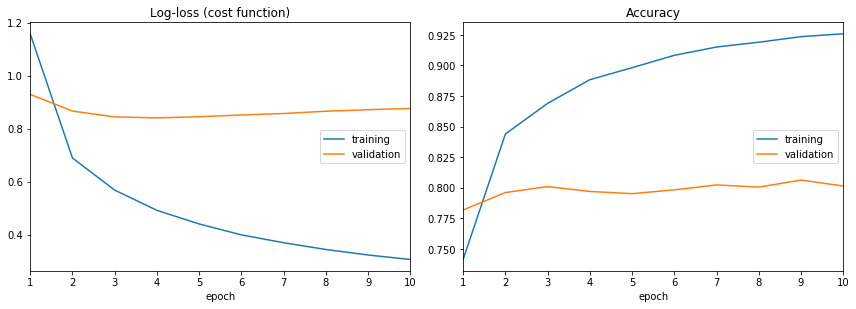

2246/2246 [==============================] - 0s 56us/step
Test score: 0.8764069984772327
Modelo 20: 0.8014247551732899


In [34]:
#Modelo:

model20 = Sequential()
model20.add(Dense(256, input_shape=(max_words,)))
model20.add(Dropout(0.4))
model20.add(Activation('selu'))
model20.add(Dense(num_classes))
model20.add(Activation('softmax'))

#Compilación

model20.compile(loss = 'categorical_crossentropy',
              optimizer = Adagrad(),
              metrics = ['accuracy'])

#Medida de desempeño:

model20.fit(x_train, y_train, validation_data=[x_test, y_test], 
          batch_size=32, epochs=10, verbose=1,
        callbacks=[PlotLossesKeras()])

score20 = model20.evaluate(x_test, y_test)
print('Test score:', score20[0])
print('Modelo 20:', score20[1])

***Modelo 21: Función de activación selu, optimizador Adagrad y Dropout 0.*5**

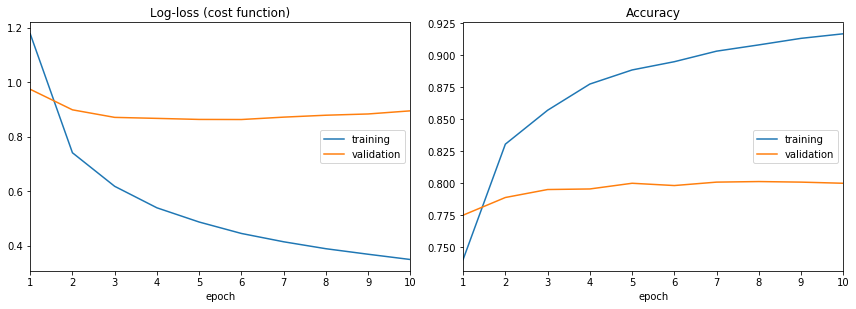

2246/2246 [==============================] - 0s 56us/step
Test score: 0.8943034600489711
Modelo 21: 0.8000890472480896


In [35]:
#Modelo:

model21 = Sequential()
model21.add(Dense(256, input_shape=(max_words,)))
model21.add(Dropout(0.5))
model21.add(Activation('selu'))
model21.add(Dense(num_classes))
model21.add(Activation('softmax'))

#Compilación

model21.compile(loss = 'categorical_crossentropy',
              optimizer = Adagrad(),
              metrics = ['accuracy'])

#Medida de desempeño:

model21.fit(x_train, y_train, validation_data=[x_test, y_test], 
          batch_size=32, epochs=10, verbose=1,
        callbacks=[PlotLossesKeras()])

score21 = model21.evaluate(x_test, y_test)
print('Test score:', score21[0])
print('Modelo 21:', score21[1])

## Conclusión:

In [36]:
print('Modelo 17:', score17[1])
print('Modelo 18:', score18[1])
print('Modelo 19:', score19[1])
print('Modelo 20:', score20[1])
print('Modelo 21:', score21[1])

Modelo 17: 0.791184327746754
Modelo 18: 0.7938557435971546
Modelo 19: 0.7943009795722215
Modelo 20: 0.8014247551732899
Modelo 21: 0.8000890472480896


Los modelos mejoran a medida que se aumenta el vaor del Dropout; para este caso usaremos un Dropout de 0.5, con el cuál se obtiene un accuracy de aproximadamente 0.80

## Usando diferentes funciones de Inicialización:

***Modelo 22: Función de activación selu, optimizador Adagrad, Dropout 0.5 y Función de inicialización he_normal***

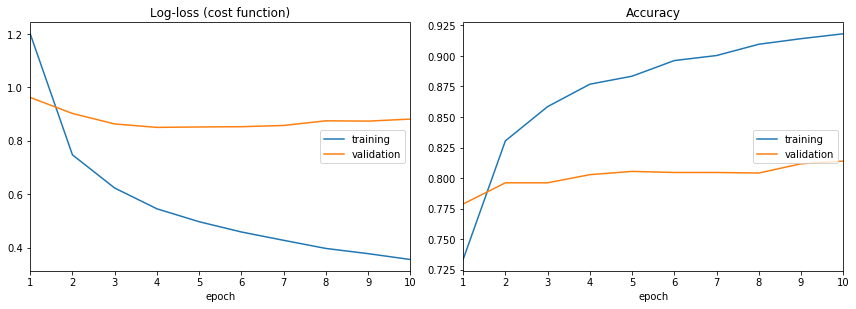

2246/2246 [==============================] - 0s 64us/step
Test score: 0.8810671123137775
Modelo 22: 0.8138913624751599


In [37]:
#Modelo:

model22 = Sequential()
model22.add(Dense(256, input_shape=(max_words,),kernel_initializer="he_normal"))
model22.add(Dropout(0.5))
model22.add(Activation('selu'))
model22.add(Dense(num_classes))
model22.add(Activation('softmax'))

#Compilación

model22.compile(loss = 'categorical_crossentropy',
              optimizer = Adagrad(),
              metrics = ['accuracy'])

#Medida de desempeño:

model22.fit(x_train, y_train, validation_data=[x_test, y_test], 
          batch_size=32, epochs=10, verbose=1,
        callbacks=[PlotLossesKeras()])

score22 = model22.evaluate(x_test, y_test)
print('Test score:', score22[0])
print('Modelo 22:', score22[1])

***Modelo 23: Función de activación selu, optimizador Adagrad, Dropout 0.5 y Función de inicialización glorot_normal***

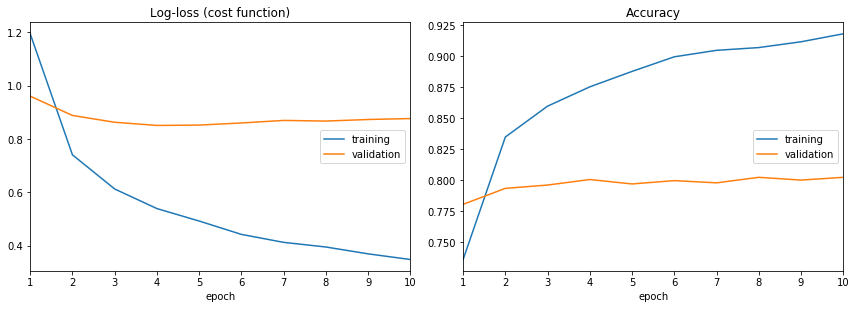

2246/2246 [==============================] - 0s 62us/step
Test score: 0.8765142936315902
Modelo 23: 0.8023152271234235


In [38]:
#Modelo:

model23 = Sequential()
model23.add(Dense(256, input_shape=(max_words,),kernel_initializer="glorot_normal"))
model23.add(Dropout(0.5))
model23.add(Activation('selu'))
model23.add(Dense(num_classes))
model23.add(Activation('softmax'))

#Compilación

model23.compile(loss = 'categorical_crossentropy',
              optimizer = Adagrad(),
              metrics = ['accuracy'])

#Medida de desempeño:

model23.fit(x_train, y_train, validation_data=[x_test, y_test], 
          batch_size=32, epochs=10, verbose=1,
        callbacks=[PlotLossesKeras()])

score23 = model23.evaluate(x_test, y_test)
print('Test score:', score23[0])
print('Modelo 23:', score23[1])

***Modelo 24: Función de activación selu, optimizador Adagrad, Dropout 0.5 y Función de inicialización Zeros***

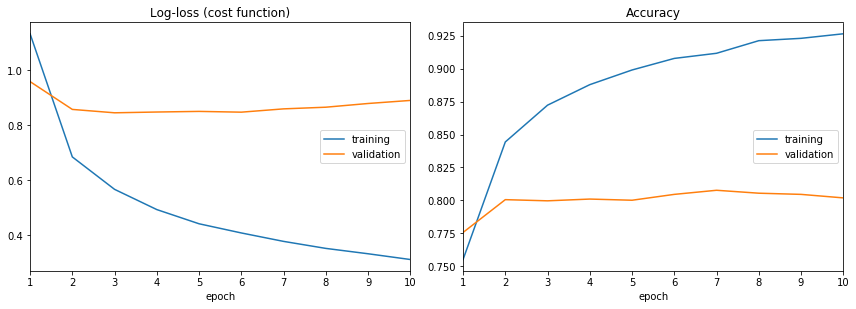

2246/2246 [==============================] - 0s 59us/step
Test score: 0.8898982494299897
Modelo 24: 0.8018699911483568


In [39]:
#Modelo:

model24 = Sequential()
model24.add(Dense(256, input_shape=(max_words,),kernel_initializer="Zeros"))
model24.add(Dropout(0.5))
model24.add(Activation('selu'))
model24.add(Dense(num_classes))
model24.add(Activation('softmax'))

#Compilación

model24.compile(loss = 'categorical_crossentropy',
              optimizer = Adagrad(),
              metrics = ['accuracy'])

#Medida de desempeño:

model24.fit(x_train, y_train, validation_data=[x_test, y_test], 
          batch_size=32, epochs=10, verbose=1,
        callbacks=[PlotLossesKeras()])

score24 = model24.evaluate(x_test, y_test)
print('Test score:', score24[0])
print('Modelo 24:', score24[1])

***Modelo 25: Función de activación selu, optimizador Adagrad, Dropout 0.5 y Función de inicialización Ones***

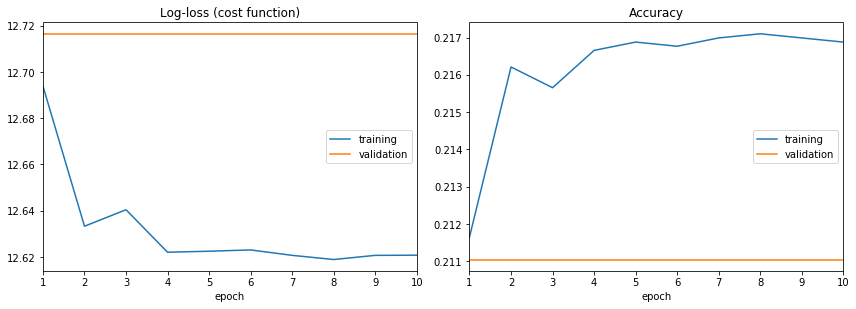

2246/2246 [==============================] - 0s 57us/step
Test score: 12.71650271190667
Modelo 25: 0.21104185218165628


In [40]:
#Modelo:

model25 = Sequential()
model25.add(Dense(256, input_shape=(max_words,),kernel_initializer="Ones"))
model25.add(Dropout(0.5))
model25.add(Activation('selu'))
model25.add(Dense(num_classes))
model25.add(Activation('softmax'))

#Compilación

model25.compile(loss = 'categorical_crossentropy',
              optimizer = Adagrad(),
              metrics = ['accuracy'])

#Medida de desempeño:

model25.fit(x_train, y_train, validation_data=[x_test, y_test], 
          batch_size=32, epochs=10, verbose=1,
        callbacks=[PlotLossesKeras()])

score25 = model25.evaluate(x_test, y_test)
print('Test score:', score25[0])
print('Modelo 25:', score25[1])

***Modelo 26: Función de activación selu, optimizador Adagrad, Dropout 0.5 y Función de inicialización RandomNormal***

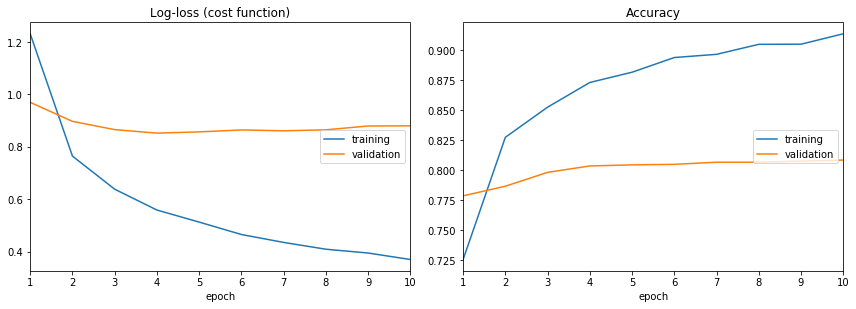

2246/2246 [==============================] - 0s 58us/step
Test score: 0.8794731465388066
Modelo 26: 0.8085485307212823


In [41]:
#Modelo:

model26 = Sequential()
model26.add(Dense(256, input_shape=(max_words,),kernel_initializer="RandomNormal"))
model26.add(Dropout(0.5))
model26.add(Activation('selu'))
model26.add(Dense(num_classes))
model26.add(Activation('softmax'))

#Compilación

model26.compile(loss = 'categorical_crossentropy',
              optimizer = Adagrad(),
              metrics = ['accuracy'])

#Medida de desempeño:

model26.fit(x_train, y_train, validation_data=[x_test, y_test], 
          batch_size=32, epochs=10, verbose=1,
        callbacks=[PlotLossesKeras()])

score26 = model26.evaluate(x_test, y_test)
print('Test score:', score26[0])
print('Modelo 26:', score26[1])

## Conclusión:

In [42]:
print('Modelo 22:', score22[1])
print('Modelo 23:', score23[1])
print('Modelo 24:', score24[1])
print('Modelo 25:', score25[1])
print('Modelo 26:', score26[1])

Modelo 22: 0.8138913624751599
Modelo 23: 0.8023152271234235
Modelo 24: 0.8018699911483568
Modelo 25: 0.21104185218165628
Modelo 26: 0.8085485307212823


La función de inicialización que mejoro el modelo es la función "he_normal".
El mejor modelo obtenido es el 22, el cuál tiene una función de ctivación selu, un optimizador Adagrad, un Drpout de 0.5 y una función de inicialización he_normal. Con este modelo se obtuvo un acccuracy de 0.81.